# Python for Neuroscientists Week 9 - Navigating Packages + Data Science

## Warmup: loading data
We'll be using the same SST dataset that we used two classes ago. Please load in this dataset. If you don't remember how to do this ... google it :)

Also just a reminder that you may have to import a few packages to make this work. This is also up to you to figure out.

<details>
<summary>Click here for a hint!</summary>
https://www.w3schools.com/python/pandas/pandas_csv.asp <br>
</details>

In [3]:
#Load in the SST dataset here
import pandas as pd
df = pd.read_csv('SST_data.csv')
df


,dF/F,time_from_stim,cell_id,exposure,trial_id,omitted,pupil_area,mean_response
0,0.213396,-1.228129,1086500633,familiar,24,False,5636.081391,0.055830
1,-0.096333,-1.195810,1086500633,familiar,24,False,5636.081391,0.055830
2,-0.117812,-1.163491,1086500633,familiar,24,False,5636.081391,0.055830
3,0.096526,-1.131172,1086500633,familiar,24,False,5636.081391,0.055830
4,-0.000783,-1.098852,1086500633,familiar,24,False,5636.081391,0.055830
...,...,...,...,...,...,...,...,...
689770,-0.116568,1.357393,1086500770,novel,4802,False,7985.740772,-0.040271
689771,-0.011238,1.389711,1086500770,novel,4802,False,7985.740772,-0.040271
689772,0.057402,1.422030,1086500770,novel,4802,False,7985.740772,-0.040271
689773,0.114362,1.454349,1086500770,novel,4802,False,7985.740772,-0.040271


## Running statistical testing in Python
Let's start with an easy problem. Say I want to compare pupil area between familiar and novel trials - let's begin by selecting a sample of each. 

In [4]:
#imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set_style('ticks')
sns.set_context('talk')

In [24]:
familiar_sample = df[df.exposure == 'familiar'].sample(15)
novel_sample = df[df.exposure == 'novel'].sample(15)
#here, we've taken samples of novel and familiar trials


In [25]:
sampled_data = pd.concat([familiar_sample, novel_sample])


<AxesSubplot:xlabel='exposure', ylabel='pupil_area'>

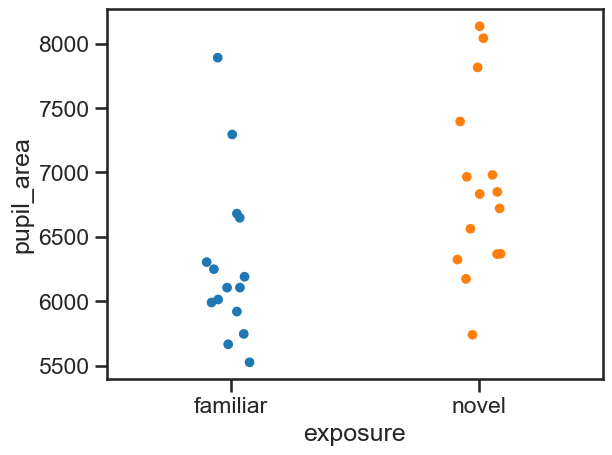

In [26]:
sns.stripplot(data = sampled_data, x = 'exposure', y = 'pupil_area', size = 7)

### Problem 1
Alright, time for a little challenge. You're going to figure out how to do stats in python. Well, to be specific, you're going to tell me what to do.

<details>
<summary>Click here for a hint!</summary>
Sorry, you don't get a hint, you're the instructor. ¯\(°_o)/¯ <br>
</details>

In [27]:
a=familiar_sample['pupil_area']
b=novel_sample['pupil_area']
stats.ttest_ind(a,b)

Ttest_indResult(statistic=-2.4575167102025657, pvalue=0.020443686139446166)

### Problem 2
Your turn! Please run a one-way ANOVA on mean_response during omitted trials. I'll be such a great instructor and even set up your data for you.

As a bonus, please plot your data as well.

Google away! As a hint, you should be using scipy for this.

In [29]:
present_sample = df[df.omitted == False].sample(20)
omitted_sample = df[df.omitted == True].sample(20)

In [30]:
a = present_sample['mean_response']
b = novel_sample['mean_response']

In [31]:
from scipy.stats import f_oneway
f_oneway(a,b)

F_onewayResult(statistic=2.842416303611845, pvalue=0.10124024592285708)

## Navigating a package

What if we want to run a linear regression, say on pupil_area vs. mean_response?

Let's take this opportunity to walk though sklearn in a little bit more detail.

<AxesSubplot:xlabel='pupil_area', ylabel='mean_response'>

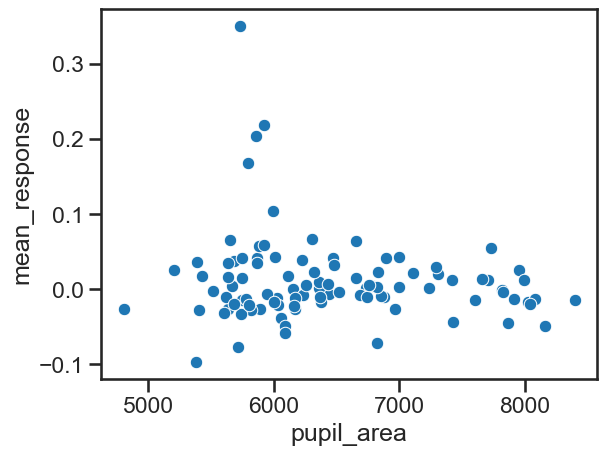

In [32]:
#Plot our data
df_sample = df.sample(100)
sns.scatterplot(data = df_sample, x = 'pupil_area', y = 'mean_response')

In [33]:
#arrange our data
X = df_sample['pupil_area'].dropna()
y = df.loc[X.index]['mean_response'].to_numpy().reshape(-1,1)
X = X.to_numpy().reshape(-1,1)

In [36]:
#run regression
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X,y)

In [38]:
#check results
reg.coef_

array([[-1.06170149e-05]])

### Builiding a simple classifier

In [39]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [45]:
X = df['dF/F'].to_numpy().reshape(-1, 85)[0:4000]
y = df['omitted'].to_numpy().reshape(-1, 85)[0:4000, 0]

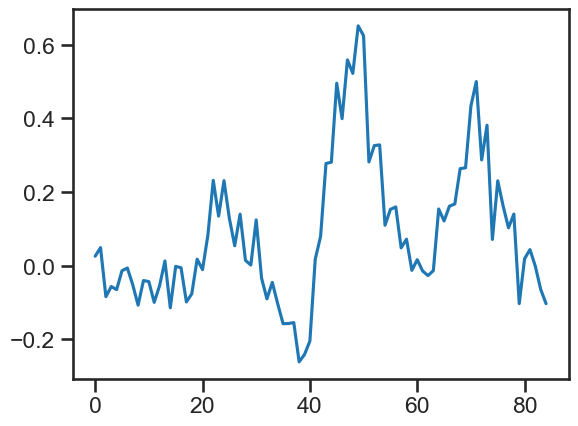

In [41]:
plt.plot(X[10])

In [46]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X,y)
SVC()


SVC()

In [48]:
y_test = df['omitted'].to_numpy().reshape(-1, 85)[:, 0]
np.where(y_test)

(array([  60,   61,   62, ..., 8103, 8104, 8105]),)

In [50]:
X = df['dF/F'].to_numpy().reshape(-1, 85)
clf.predict([X[8103]])

array([ True])